In [31]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf

In [32]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile

In [33]:
TRAINING_DIR = '../input/dataset-ekush/Ekush_data_set/train'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   featurewise_center=False,  # set input mean to 0 over the dataset
                                   samplewise_center=False,  # set each sample mean to 0
                                   featurewise_std_normalization=False,  # divide inputs by std of the dataset
                                   samplewise_std_normalization=False,  # divide each input by its std
                                   zca_whitening=False,  # apply ZCA whitening
                                   rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
                                   zoom_range = 0.01, # Randomly zoom image 
                                   width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                   height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                   horizontal_flip=False,  # randomly flip images
                                   vertical_flip=False  
                                   )

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(64,64),
                                                    )

Found 146509 images belonging to 60 classes.


In [34]:
"""
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                                    '../input/bangla-isolated-dataset/Balanced_isloted_dataset/Test',
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(64,64)
                                                     )
                                                     """

"\ntest_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(\n                                                    '../input/bangla-isolated-dataset/Balanced_isloted_dataset/Test',\n                                                    batch_size=128,\n                                                    class_mode='categorical',\n                                                    target_size=(64,64)\n                                                     )\n                                                     "

In [35]:
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                                    '../input/dataset-ekush/Ekush_data_set/val',
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(64,64)
                                                     )

Found 36655 images belonging to 60 classes.


In [36]:
import os 
import warnings
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import regularizers, activations

In [37]:

classifier=Sequential()

classifier.add(Conv2D(filters=64, kernel_size = (3,3),padding='same', activation="relu", input_shape=(64,64,3)))
classifier.add(Conv2D(filters=64, kernel_size = (3,3),padding='same', activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(.25))

classifier.add(Conv2D(filters=128, kernel_size = (3,3),padding='same', activation="relu"))
classifier.add(Conv2D(filters=128, kernel_size = (3,3),padding='same', activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization())  
classifier.add(Dropout(.25))  

classifier.add(Conv2D(filters=256, kernel_size = (3,3),padding='same', activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(.25))
    
classifier.add(Flatten())

classifier.add(Dense(512,activation="relu",kernel_regularizer= regularizers.l2(0.001)))
classifier.add(Dense(256,activation="relu",kernel_regularizer= regularizers.l2(0.001)))
classifier.add(Dense(128,activation="relu",kernel_regularizer= regularizers.l2(0.001)))
classifier.add(Dropout(.25))
    
classifier.add(Dense(60,activation="softmax"))




In [38]:
classifier.compile(loss='categorical_crossentropy', 
                metrics=['accuracy'],
                optimizer=Adam(learning_rate=0.00004))

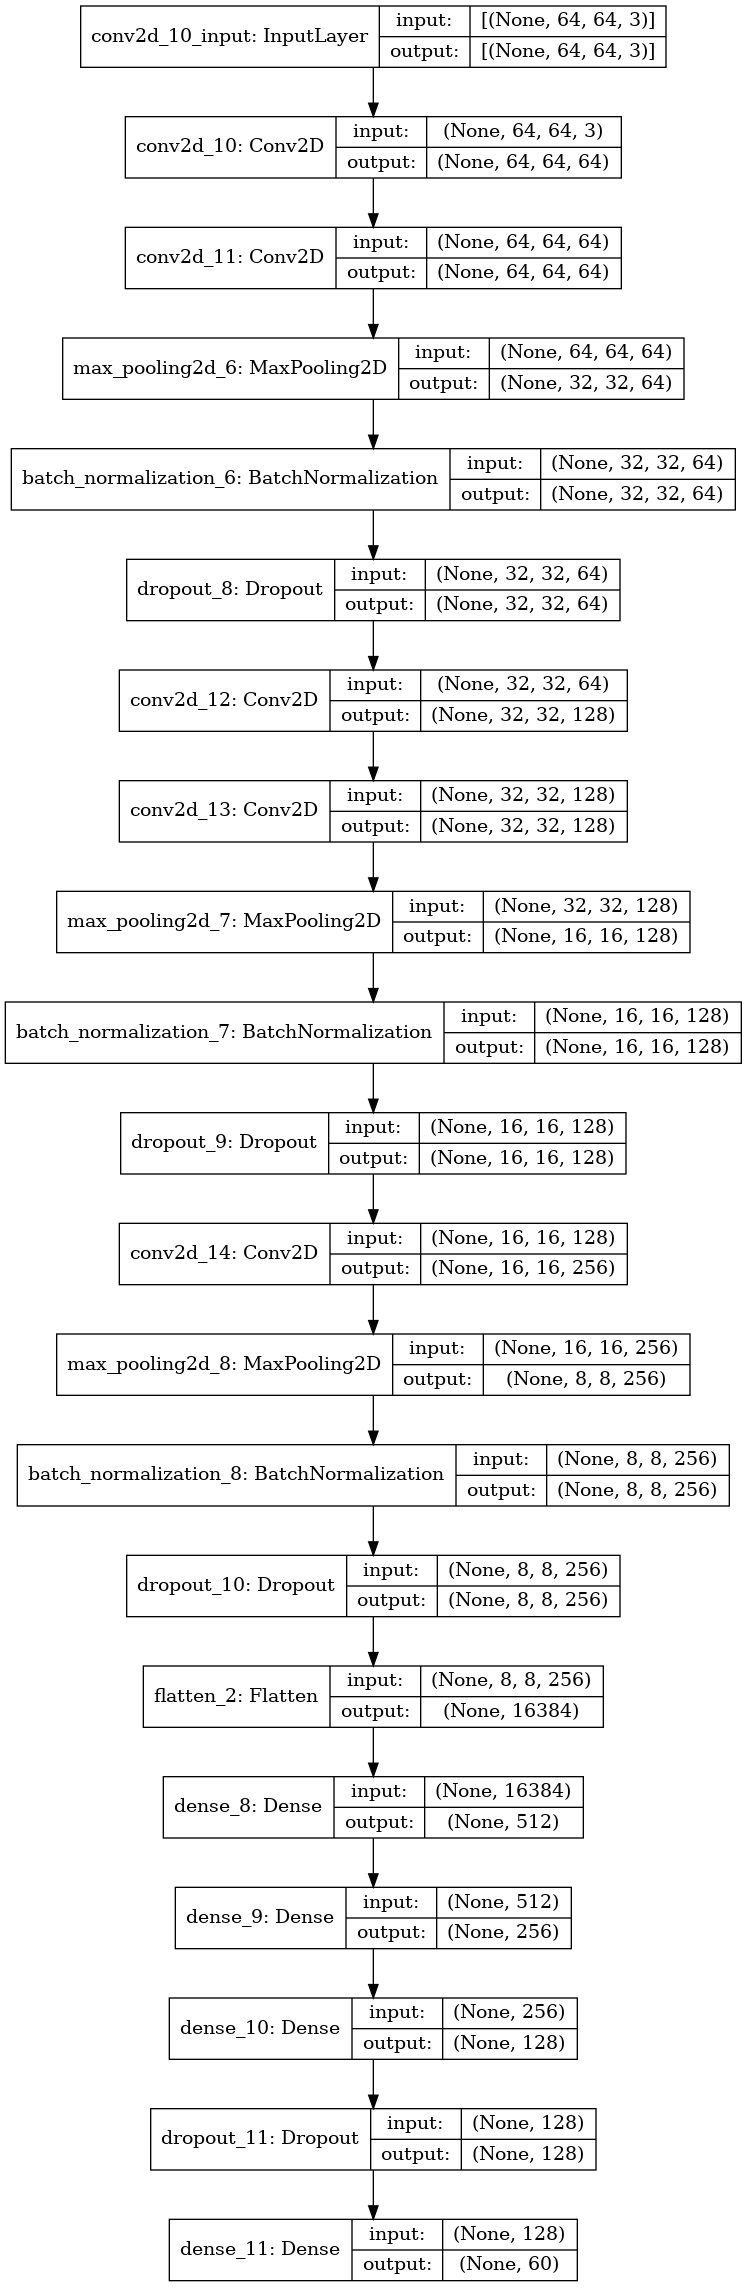

In [39]:
from tensorflow.keras.utils import plot_model
plot_model(classifier, 'Architecture.png', show_shapes=True)

In [40]:
#Details for model
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 128)      

In [41]:
"""
from google.colab import files
files.download('Architecture.png')
"""

"\nfrom google.colab import files\nfiles.download('Architecture.png')\n"

In [42]:
filepath = "Final_Model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [43]:
history = classifier.fit(train_generator,steps_per_epoch = len(train_generator), epochs = 50,
                        validation_data = val_generator, validation_steps =  len(val_generator),callbacks=callbacks_list)

Epoch 1/50
1145/1145 [==============================] - 340s 296ms/step - loss: 3.7992 - accuracy: 0.3966 - val_loss: 2.2309 - val_accuracy: 0.7813

Epoch 00001: val_loss improved from inf to 2.23087, saving model to Final_Model.h5
Epoch 2/50
1145/1145 [==============================] - 320s 280ms/step - loss: 2.4921 - accuracy: 0.6871 - val_loss: 1.8160 - val_accuracy: 0.8631

Epoch 00002: val_loss improved from 2.23087 to 1.81604, saving model to Final_Model.h5
Epoch 3/50
1145/1145 [==============================] - 322s 281ms/step - loss: 2.0708 - accuracy: 0.7756 - val_loss: 1.5919 - val_accuracy: 0.8995

Epoch 00003: val_loss improved from 1.81604 to 1.59193, saving model to Final_Model.h5
Epoch 4/50
1145/1145 [==============================] - 324s 283ms/step - loss: 1.8089 - accuracy: 0.8229 - val_loss: 1.4582 - val_accuracy: 0.9089

Epoch 00004: val_loss improved from 1.59193 to 1.45818, saving model to Final_Model.h5
Epoch 5/50
1145/1145 [==============================] - 327s

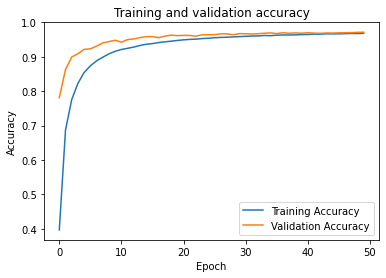

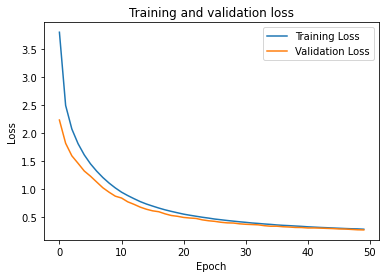

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

**Prediction **

In [45]:
loss_t, accuracy_t = classifier.evaluate(train_generator, steps=128)
loss, accuracy = classifier.evaluate(val_generator,steps=128)
loss_v, accuracy_v = classifier.evaluate(val_generator, steps=128)
print("\nTrain: accuracy = %f  ;  loss_v = %f\n" % (accuracy_t, loss_t))
print("Validation: accuracy = %f  ;  loss_v = %f\n" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f\n" % (accuracy, loss))


128/128 [==============================] - 14s 110ms/step - loss: 0.2611 - accuracy: 0.9734

Train: accuracy = 0.978333  ;  loss_v = 0.243318

Validation: accuracy = 0.973450  ;  loss_v = 0.261122

Test: accuracy = 0.973145  ;  loss = 0.259022

